# An Exploratory Data Analysis On Wine Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
wine_data = pd.read_csv ('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv', sep = ';')

### To understand the data I previewed the first 10 rows, checked for missing values and the data types using the .info method.

In [3]:
wine_data.head (10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_data.info() #This gives a glimpse if there are missing values (.isna method can also be used). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Columns details:

##### Dataset comprises 1599 observations (rows) and 12 features (columns).
##### Input variables: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.
##### Output variable: quality ( wine quality is rated between 0 - very bad, and 10 - very excellent); The input variables are used to determine (or predict) the target Variable.
##### No missing values in the dataset.

# 

### Getting the summary statistics of the dataset. This helps give information if there are outliers in the dataset.

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#####  A notable large difference between 75th percentile and max values of input variables “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide” can be seen. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th percentile).

In [6]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Insights
* No quality rating of 10 ( Very Excellent ) for the wine
* Also, 1,2,9 ratings are not given by any observation. Only scores obtained are 5, 6, 7, 4, 8, 3

In [7]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Insights
* Quality rating has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 8.

## USING VISUALIZATION FOR POSSIBLE PATTERNS

### Calling the histogram method on all the series in the dataframe to visualize each of the input variables and also barplot on the output variable.

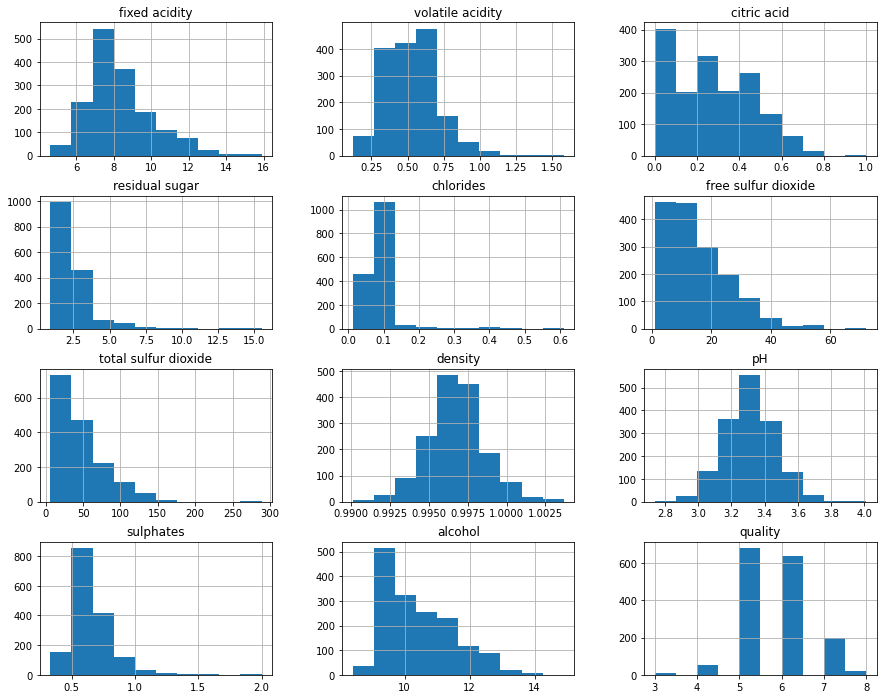

In [8]:
wine_data.hist(bins=10, figsize=(15, 12))
plt.show()

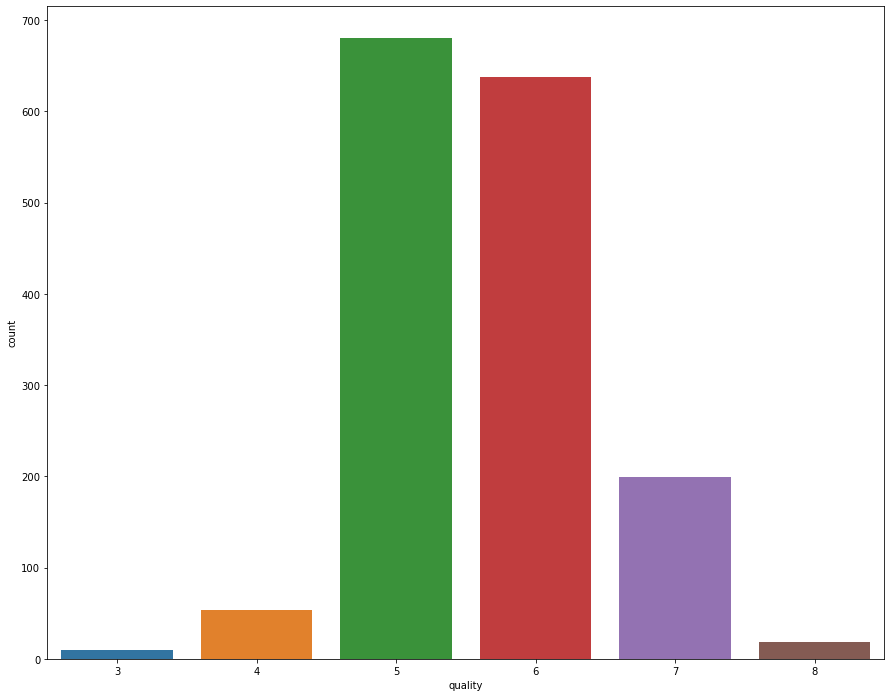

In [14]:
plt.figure (figsize=(15, 12))
sns.countplot(wine_data.quality)
xlabel ='quality'
ylabel ='count'

* The average (5-7) quality of wines are more than bad (1-4) and good (8-10) quality of wines.
* alcohol seems to be positively skewed
* density and pH are quite normally distributed

### Checking the relationship between each of the variables using correlation method.

In [10]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


* 0.9 or 1 represents strong and perfect positive correlation
* -0.9 or -1 represents strong negative correlation
* 0.5 or 0.7 represents slight or high positive correlation
* Values close to zero indicates no correlation

<AxesSubplot:>

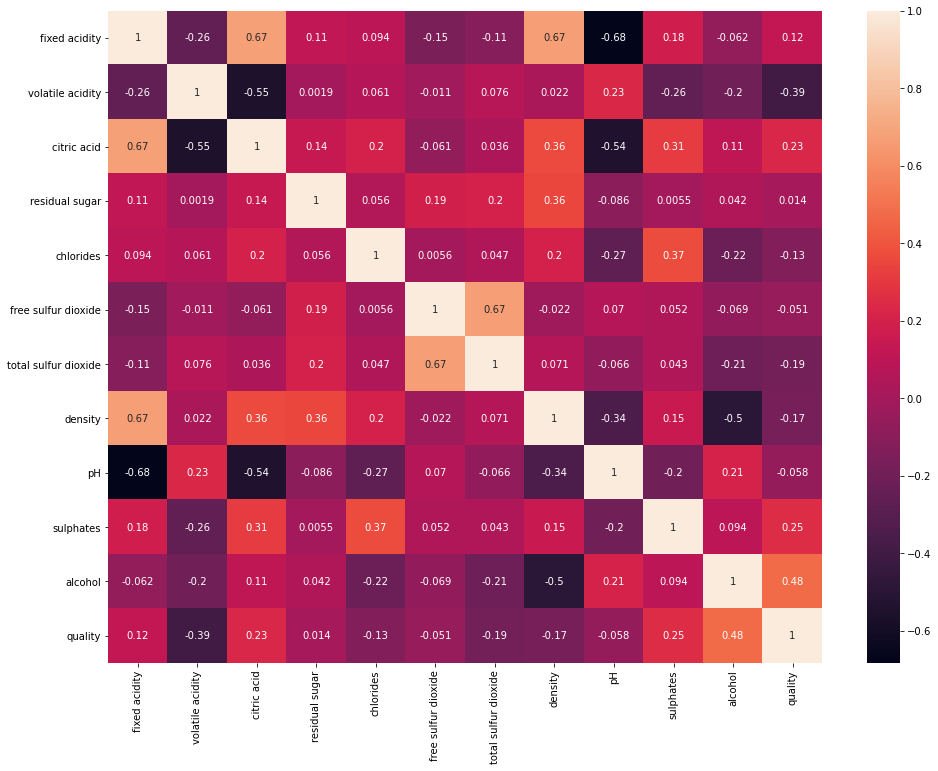

In [11]:
plt.figure (figsize=(16, 12))
sns.heatmap ( data= wine_data.corr(), annot=True )

### Insights
* In relation to quality, alcohol has the highest positive correlation with the wine quality.